In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

raw_df = pd.read_csv('./card_transdata.csv')

In [37]:
df = raw_df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

Duplicated values dropped succesfully


Imbalance check

In [38]:
labels=["Valid","Fraud"]

fraud_or_not = raw_df["fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=raw_df['fraud'].value_counts(), names=labels , width=700, height=400, 
             color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Valid transactions")
fig.show()

print('Valid:', round(raw_df['fraud'].value_counts()[0]/len(raw_df) * 100,2), '% of the dataset')
print('Frauds:', round(raw_df['fraud'].value_counts()[1]/len(raw_df) * 100,2), '% of the dataset')

Valid: 91.26 % of the dataset
Frauds: 8.74 % of the dataset


Rebalance the ratio

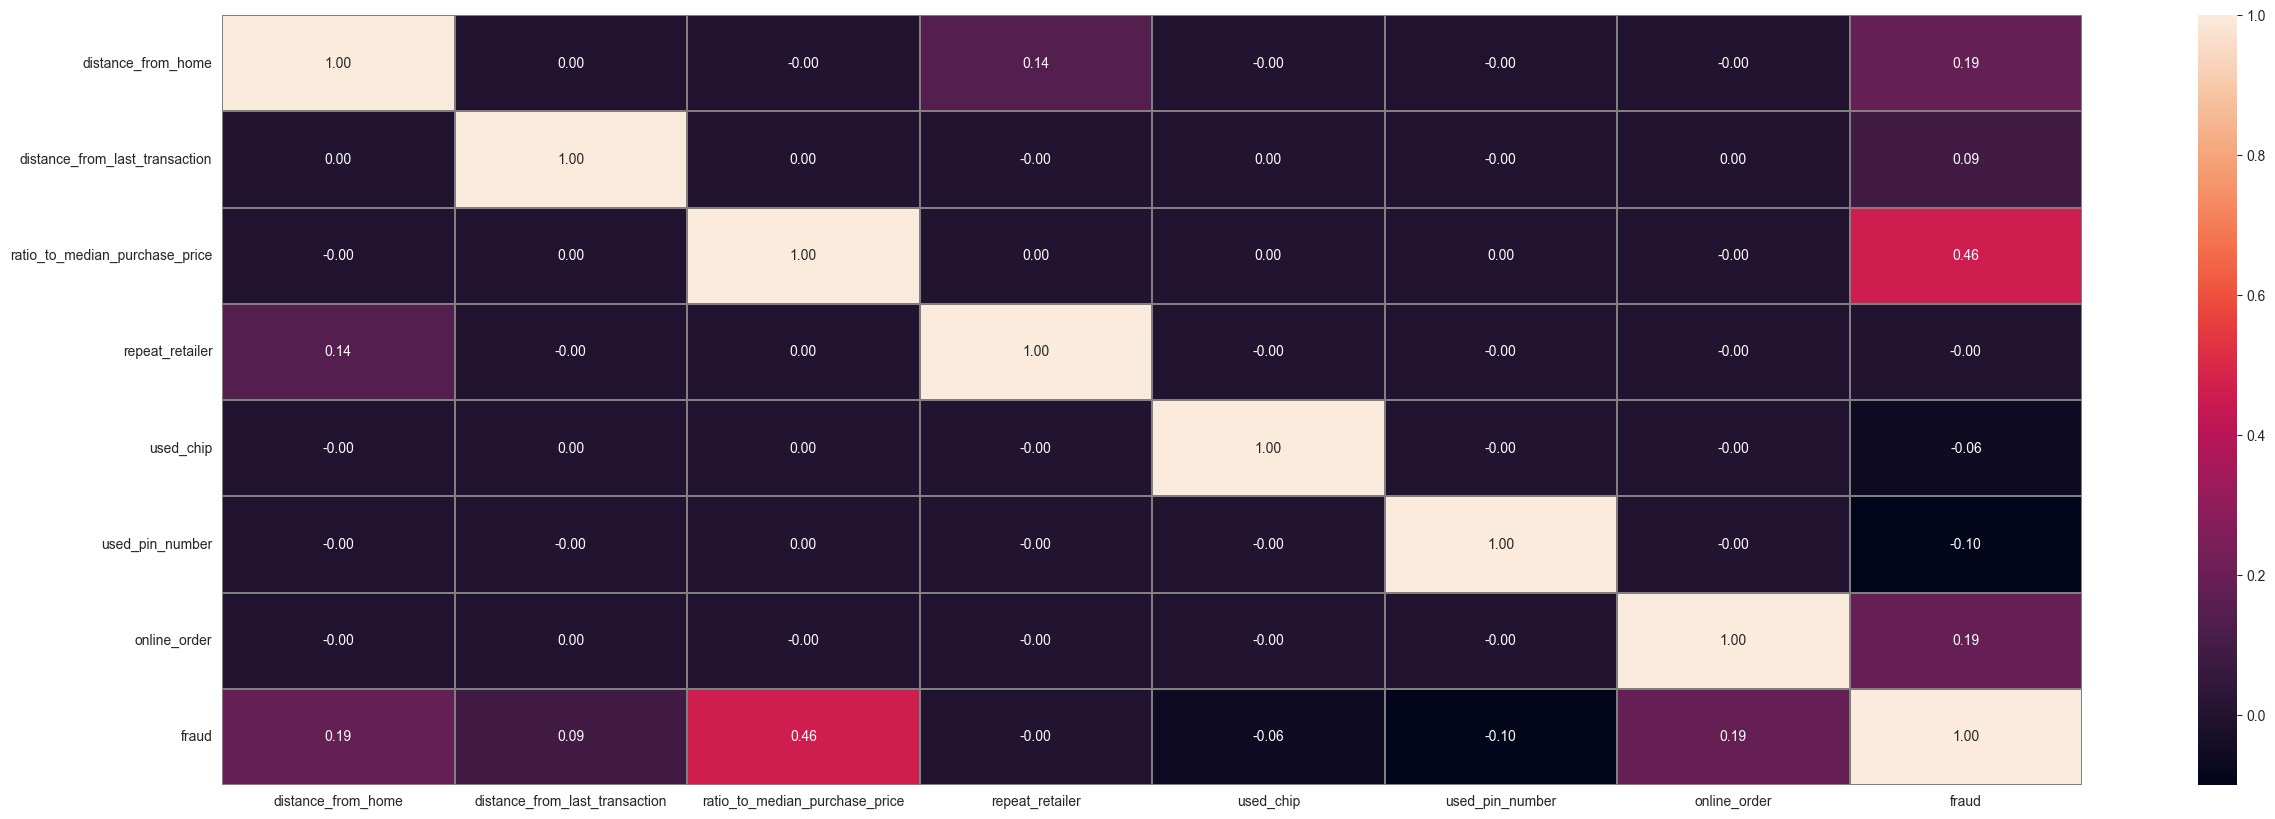

In [39]:
plt.figure(figsize = (30, 10))
sns.heatmap(
    df.corr(),
    annot = True,
    fmt = '.2f',
    linewidths=0.1,
    linecolor='gray',
)

plt.show()
# Table de corrélations à effectuer sur un plus grand échantillon de données

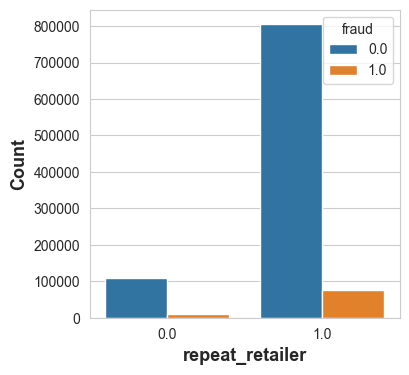

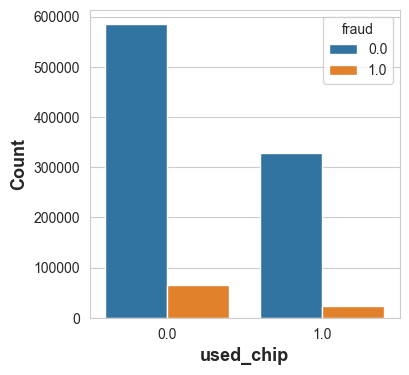

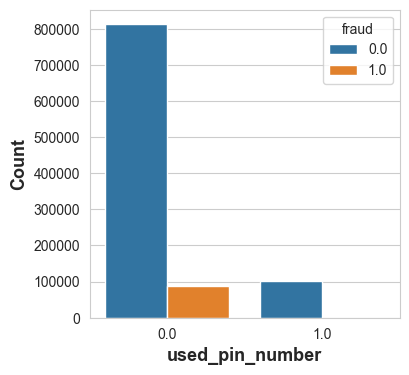

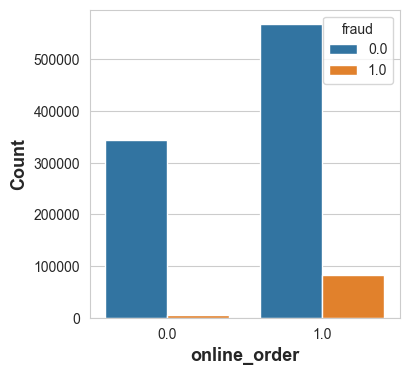

In [40]:
categorical_columns = ['repeat_retailer', 'used_chip','used_pin_number', 'online_order']
for i, col in enumerate(categorical_columns):
    plt.figure(figsize = (4, 4))
  
    sns.countplot(
        data = df, 
        x = col,
        hue = 'fraud',
    )
    plt.xlabel(col, size = 13, weight = 'bold')
    plt.ylabel('Count', size = 13, weight = 'bold')
    plt.show()

/var/folders/7l/brs5n_rn7z76903ky3f3g97w0000gn/T/ipykernel_10037/1473417032.py:16: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/7l/brs5n_rn7z76903ky3f3g97w0000gn/T/ipykernel_10037/1473417032.py:26: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.

/var/folders/7l/brs5n_rn7z76903ky3f3g97w0000gn/T/ipykernel_10037/1473417032.py:34: UserWarning:

The palette list has more values (3) than needed (2), which may not be intended.



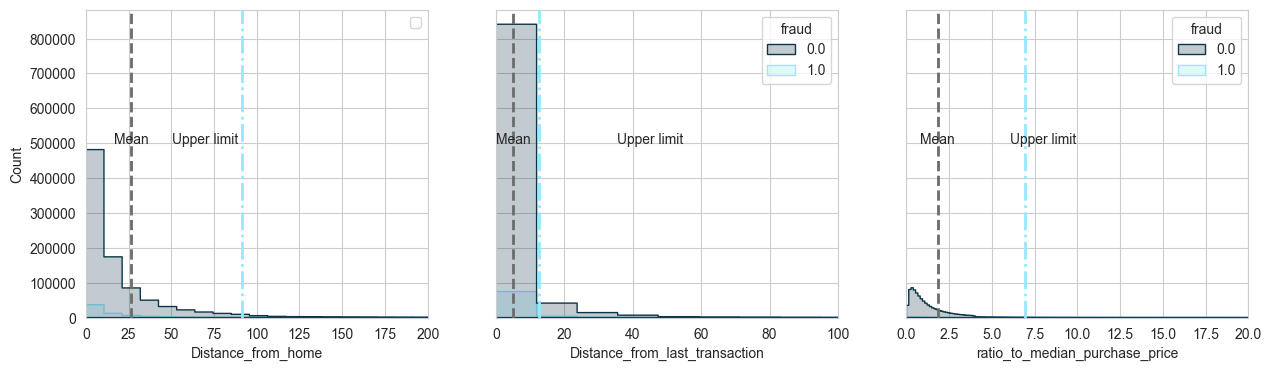

In [41]:
def value_iqr(df, variable):
      q1 = round(df[variable].quantile(q = 0.25),2)
      q3 = round(df[variable].quantile(q = 0.75), 2)
      IQR = q3 - q1

      upper_limit = round(q3 + 3 * IQR , 2)      
      return upper_limit

upper_limit_distance_from_home = value_iqr(df, "distance_from_home")
upper_limit_distance_from_last_transaction = value_iqr(df, "distance_from_last_transaction")
upper_limit_ratio_to_median_purchase_price = value_iqr(df, "ratio_to_median_purchase_price")

colors = ["#0E3547", "#92EAFF", "#6B6B6B"]

fig, ax = plt.subplots(1, 3, figsize=(15,4), sharey=True)
sns.histplot(data=df, x="distance_from_home", bins=1000, color=colors[0], hue="fraud", ax=ax[0], element="step", palette=colors)
ax[0].set_xlim(0, 200)
ax[0].axvline(np.mean(df["distance_from_home"]), linewidth=2, color=colors[2], linestyle='--')
ax[0].axvline(upper_limit_distance_from_home, linewidth=2, color=colors[1], linestyle='-.')
ax[0].annotate("Mean", (np.mean(df["distance_from_home"]),  500000), ha='center')
ax[0].annotate("Upper limit", (70,  500000), ha='center')
ax[0].set_xlabel("Distance_from_home")
ax[0].set_ylabel("Count")
ax[0].legend()

sns.histplot(data=df, x="distance_from_last_transaction", bins=1000, color=colors[0], hue="fraud", ax=ax[1], element="step", palette=colors)
ax[1].set_xlabel("Distance_from_last_transaction")
ax[1].set_xlim(0, 100)
ax[1].axvline(np.mean(df["distance_from_last_transaction"]), linewidth=2, color=colors[2], linestyle='--')
ax[1].annotate("Mean", (np.mean(df["distance_from_last_transaction"]),  500000), ha='center')
ax[1].axvline(upper_limit_distance_from_last_transaction , linewidth=2, color=colors[1], linestyle='-.')
ax[1].annotate("Upper limit", (45,  500000), ha='center')

sns.histplot(data=df, x="ratio_to_median_purchase_price", bins=2000, color=colors[0], hue="fraud", ax=ax[2],  element="step", palette=colors)
ax[2].set_xlabel("ratio_to_median_purchase_price")
ax[2].set_xlim(0, 20)
ax[2].axvline(np.mean(df["ratio_to_median_purchase_price"]), linewidth=2, color=colors[2], linestyle='--')
ax[2].annotate("Mean", (np.mean(df["ratio_to_median_purchase_price"]),  500000), ha='center')
ax[2].axvline( upper_limit_ratio_to_median_purchase_price , linewidth=2, color=colors[1], linestyle='-.')
ax[2].annotate("Upper limit", (8,  500000), ha='center')

plt.subplots_adjust(wspace=0.2)
plt.show()

# The largest number of records for the distance_from_home variable are found within a distance of less than 100 miles.
# The largest number of records for the Distance_from_last_transaction variable are within a distance of less than 50 miles.
# A similar distribution is observed between fraud and non-fraud labels

In [42]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('fraud', axis=1)
y = df['fraud']

# Perform random undersampling
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Create a DataFrame with the resampled data
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['fraud'] = y_resampled

print("Class Distribution after Undersampling:")
print(resampled_df['fraud'].value_counts(normalize=True))

Class Distribution after Undersampling:
fraud
0.0    0.666667
1.0    0.333333
Name: proportion, dtype: float64


In [43]:
import pickle
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

selected_features = ['distance_from_home', 'ratio_to_median_purchase_price', 'online_order']
X = resampled_df[selected_features]
y = resampled_df['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the trained Logistic Regression model to a file
with open("random_forest_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

Accuracy: 0.9610236070325312

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     34956
         1.0       0.95      0.93      0.94     17486

    accuracy                           0.96     52442
   macro avg       0.96      0.95      0.96     52442
weighted avg       0.96      0.96      0.96     52442


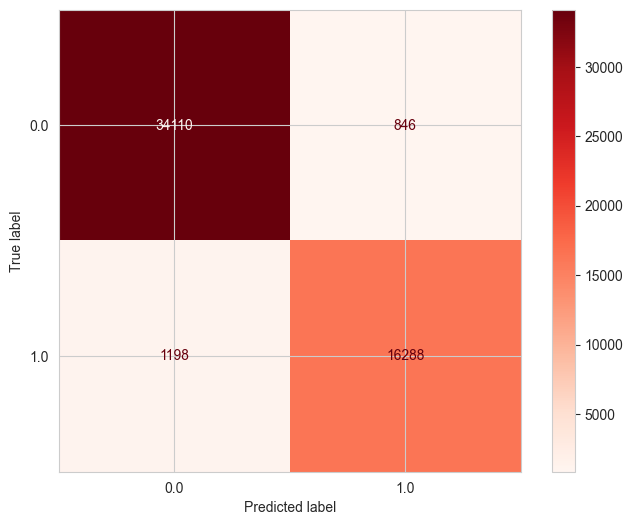

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8, 6))
                                
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax,
                                        cmap='Reds', colorbar=True)

plt.show()